In [1]:
import warnings
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from brain_decoding.config.file_path import RESULT_PATH, DATA_PATH
from brain_decoding.utils.analysis import (
    prediction_curve, correlation_heatmap, smooth_columns, combine_continuous_scores, stage_box_plot, read_sleep_score,
    correlation_heatmap_by_stage, multi_facet_correlation_heatmap, load_prediction, filter_predictions, concept_frequency,
    add_label_count
)
# from brain_decoding.utils.analysis import CONCEPT_LABELS as labels
# from brain_decoding.param.param_data import TWILIGHT_LABELS as labels
from brain_decoding.param.param_data import TWILIGHT_LABELS_MERGE as labels

# Suppress all UserWarning messages
warnings.filterwarnings('ignore', category=UserWarning)

activation_path = os.path.join(
    RESULT_PATH, 
    # '8concepts/562_None_multi-vit_test_optimalX_CARX_2024-10-23_16-09-32/memory/prediction/epoch40_test_sleep_3_results.npy'
    # 'twilight/570_None_multi-vit_test_optimalX_CARX_2024-11-06_16-42-25/memory/prediction/epoch40_test_sleep_1_results.npy'
    'twilight_merged/570_None_multi-vit_test_optimalX_CARX_2024-11-07_12-03-07/memory/prediction/epoch40_test_sleep_1_results.npy'
)

# sleep_score_file = '/Users/XinNiuAdmin/Documents/brain_decoding/data/562/EXP6_Movie24&562_firstpass.csv'
sleep_score_file = ''

file_path = os.path.dirname(activation_path)

sleep_score = None
# sleep_score = read_sleep_score(sleep_score_file)
# sleep_score.head(5)

Count the number of 250 ms intervals for each concept:

In [2]:
# concept_file = f"{DATA_PATH}/twilight_concepts.npy"
concept_file = f"{DATA_PATH}/twilight_concepts_merged.npy"
concept_count, _ = concept_frequency(concept_file, labels)
concept_count

{'Bella.Swan': 6385,
 'Edward.Cullen': 2582,
 'No.Characters': 1428,
 'Others': 1860}

'Others' does not include frame with cooccurence of Bella.Swan and Edward.Cullen.

In [4]:
predictions = load_prediction(activation_path)
predictions, labels = filter_predictions(predictions, labels, .1)
labels = add_label_count(labels, concept_count)

shape of predictions: (118417, 4), duration: 8.223402777777778 hours


Total duration of sleep data is ~8 hours, the sampling interval for `predictions` is .25 seconds
Each label in the sleep score file is 30 seconds.

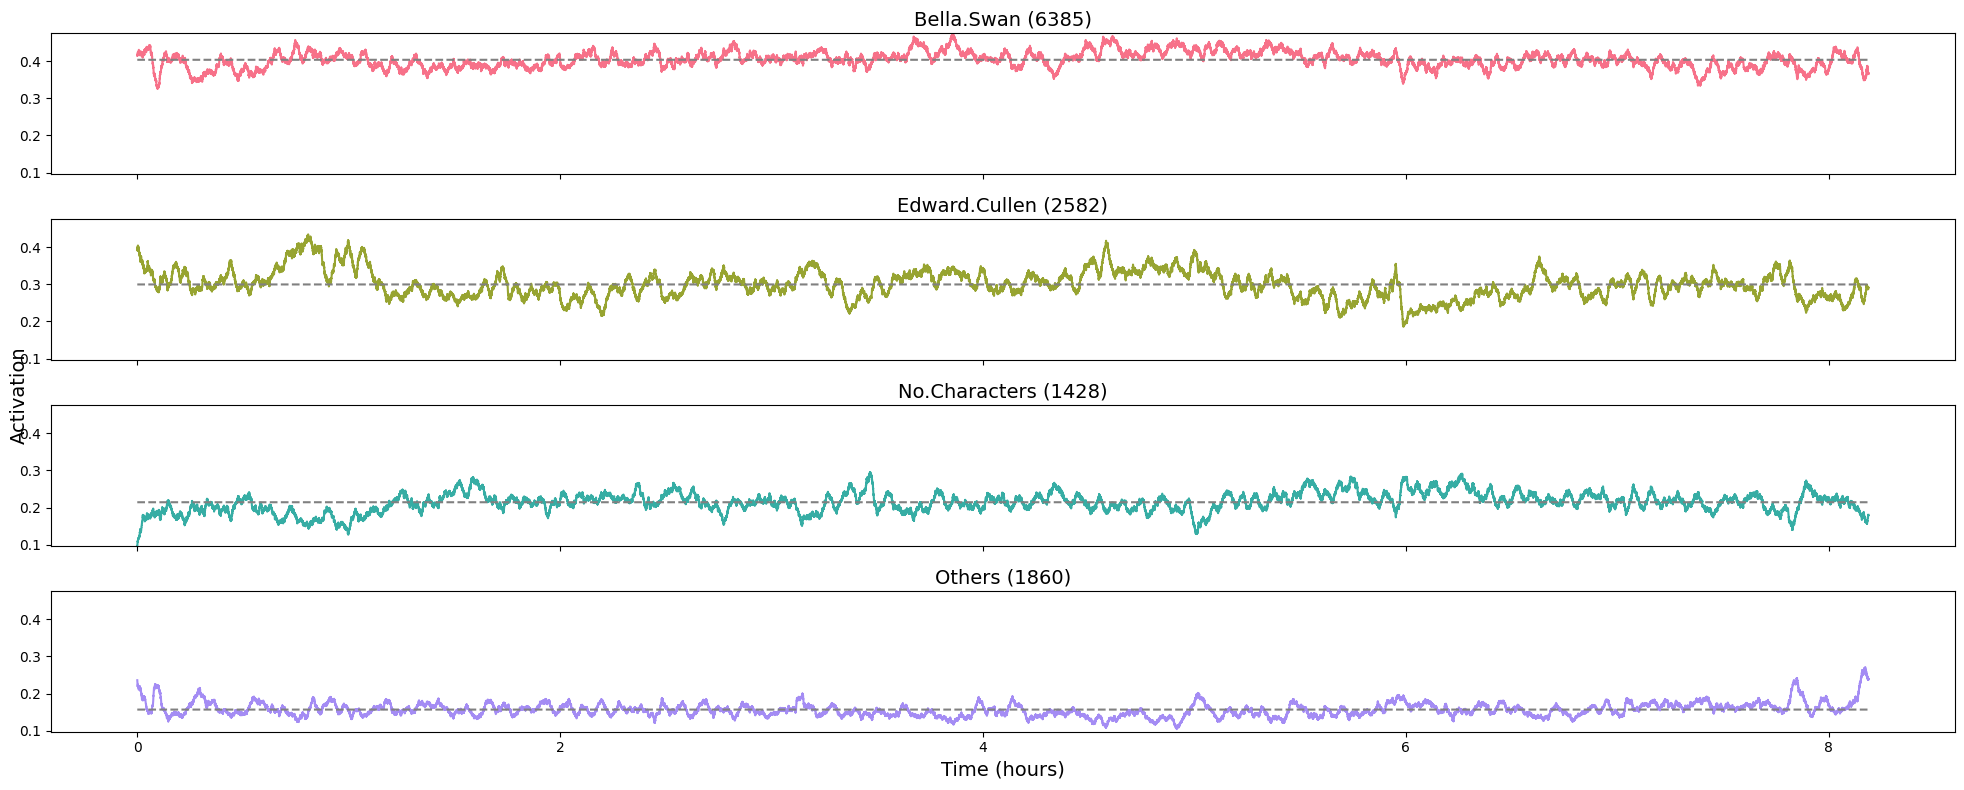

In [5]:
# Function to apply moving average smoothing
window_size = 500
result_path = os.path.join(file_path, 'epoch40_activation.png')
smoothed_predictions = smooth_columns(predictions, window_size)
prediction_curve(smoothed_predictions, sleep_score, labels, result_path)

## Box plot of prediction values (>.5) for each sleep stage. 
Stages shorter than 10 mins are excluded

In [ ]:
result_path = os.path.join(file_path, 'epoch40_activation_box.png')
stage_box_plot(predictions, sleep_score, labels, result_path)

## Correlation of activations for each concept

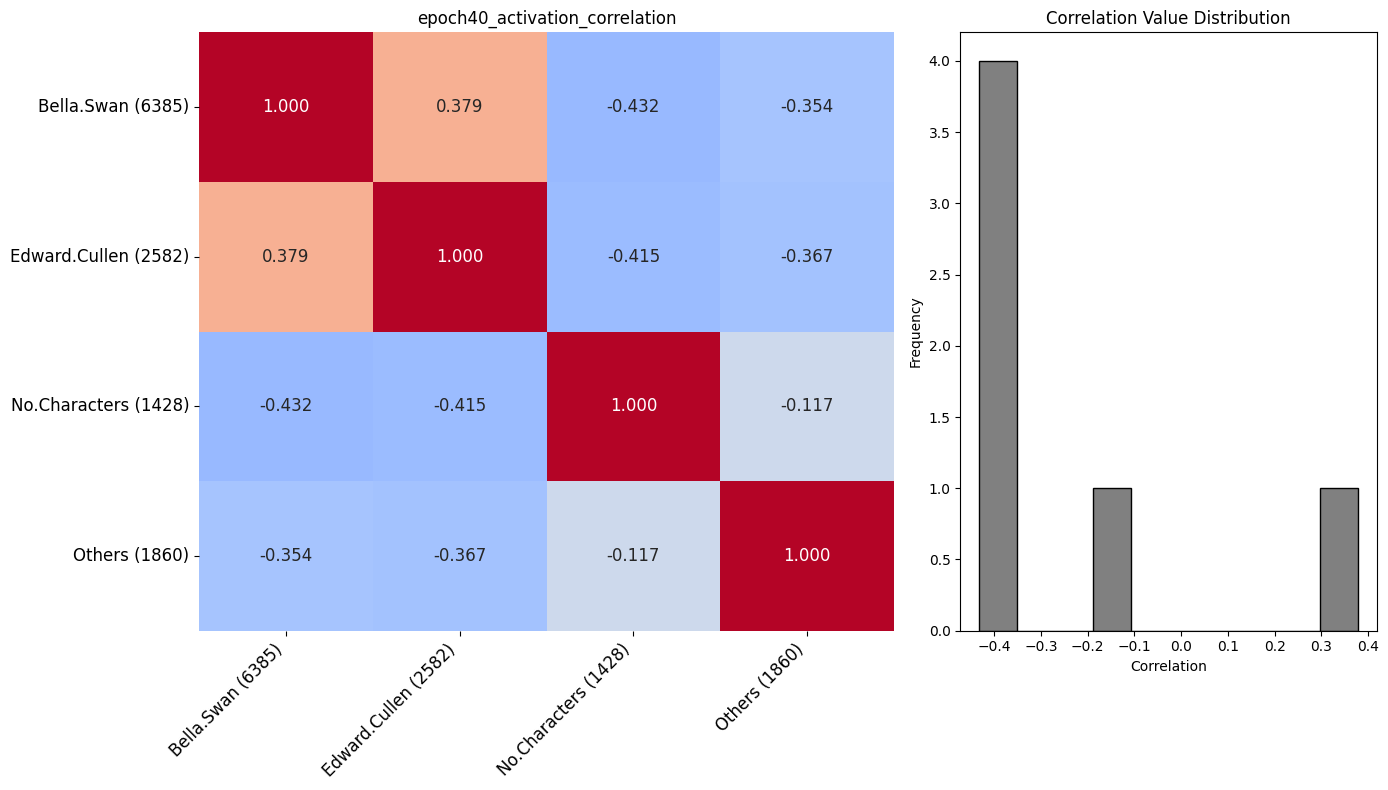

In [6]:
result_path = os.path.join(file_path, 'epoch40_activation_correlation.png')
correlation_heatmap(predictions, labels, result_path)

## correlation of activations for each sleep stage
Only stages longer than 10 mins are included.

In [ ]:
result_path = os.path.join(file_path, 'epoch40_activation_correlation_by_stage.png')
multi_facet_correlation_heatmap(predictions, labels, sleep_score, result_path)